## 🎯SEGMENTATION_OF_HYDERABAD_EMPLOYESS_BASED_ON_SALLARY(Clustering):

## 🔍 Clustering Problem Farming :

### 1️⃣ Why This Research Matters ?
  * Helps HR & recruiters identify salary benchmarks and fair pay ranges across companies and roles.
  * Supports career planning for employees by giving salary expectations based on skills, experience, and qualifications.
  * Improves hiring efficiency by targeting the right candidate profiles for specific salary budgets.
  * Assists companies in retention strategies by detecting underpaid yet high-skilled employees who may be at risk of leaving.
### 2️⃣ Target Variable (Label)
  * Column: salary (converted to numeric in lakhs per annum).
  * Type: Regression (continuous prediction of salary amount).
    * Alternatively, can be turned into classification by defining salary brackets:
      * Low Salary (≤ ₹5 LPA)
      * Mid Salary (₹5–₹10 LPA)
      * High Salary (> ₹10 LPA)
### 3️⃣ Features (Predictors)
  * From the dataset:
   * Job Information:
    * designation → Job title/role (e.g., Software Developer, Manager)
    * companyName → Employer name
  * Experience & Skills:
    * experienceMas → Converted to numeric years of experience
    * qualificationMas → Primary education qualification
    * qualificationMas2 → Secondary/Additional qualification
  * Location:
   * locationCurrentMas → Current work location (mostly Hyderabad/Secunderabad)
### 4️⃣ Constraints
  * Time: Predictions should be quick so salary insights can be given instantly during hiring or HR discussions.
  * Interpretability: HR teams may prefer models they can explain (e.g., Decision Trees, Random Forest with feature importance).
  * Accuracy: Must minimize large errors in salary prediction — even a ₹1–2 LPA deviation can be critical in HR negotiations.
  * Cost: Mis-predicted high salaries may cause budget overruns; mis-predicted low salaries may result in losing talent to competitors.

## 🛠 Importing Required Libararies and Modules :

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder,normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs



## ⏳ Data Loading and Understanding :
* Dataset shape: 28,847 rows × 9 columns
* Columns:
  * candidateName → Employee name
  * companyName → Company of employment
  * designation → Job title
  * experienceMas → Experience in years and months
  * locationCurrentMas → Current location (mostly Hyderabad/Secunderabad)
  * qualificationMas → Primary qualification
  * qualificationMas2 → Secondary qualification
  * salary → Annual salary (target variable)
  * Category → Constant value "HYDERABAD-SALARIED" (not predictive)
* Missing values:
  * designation → 4,630 missing
  * qualificationMas → 4,876 missing
  * qualificationMas2 → 13,398 missing
  * companyName → 41 missing
  * candidateName → 4 missing
  * salary & experienceMas have no missing values

In [7]:
#  Load the CSV
df=pd.read_csv("hyderabad_salaried_employees.csv")

In [8]:
df.head()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,HYDERABAD-SALARIED
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,HYDERABAD-SALARIED
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,HYDERABAD-SALARIED
3,SRIKANTH,Axis Bank Ltd,NaN,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,HYDERABAD-SALARIED
4,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,HYDERABAD-SALARIED


In [9]:
# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [10]:
numerical_features

[]

In [11]:
categorical_features

['candidateName',
 'companyName',
 'designation',
 'experienceMas',
 'locationCurrentMas',
 'qualificationMas',
 'qualificationMas2',
 'salary',
 'Category']

## 📢 UNDERSTANDING THE DATA-FEATURES :
* Context
    * This dataset contains details of salaried employees in Hyderabad. It can be used to build a predictive model for tasks such as salary range prediction, attrition risk prediction, or job level classification.
For example, HR teams or recruiters could use such a model to quickly estimate salary expectations for new applicants or to detect anomalies in employee data.
* Content
    * The dataset hyderabad_salaried_employees.csv contains several columns describing employee demographics, job details, and salary information.
* Sample Column Descriptions
   * name — Employee name (categorical, might be dropped for modeling)
   * age — Employee age (numeric)
   * gender — Gender (categorical: "Male", "Female", "Other")
   * education — Education qualification (categorical: "B.Tech", "MBA", etc.)
   * experienceMas — Experience (text like "5 Years 6 Months") (numeric after preprocessing)
   * company — Current employer (categorical)
   * location — Job location (categorical, may have variants like "HYD", "Hyderabad")
   * job_role — Designation (categorical)
   * salary — Monthly or yearly salary (numeric)
   * industry — Industry type (categorical)
* Target Variable Example:
  * salary_range — Predicted as "Low", "Medium", "High"
  * Or directly predict salary as a regression problem.
* Purpose of the Dataset
  * The goal is to train a predictive model that can estimate an employee’s salary (or classify into ranges) based on demographic and job-related  features.
By analyzing historical employee salary data, we can identify patterns that influence pay scales, helping recruiters and HR make data-driven salary decisions.

In [13]:
# Check for target variable (Salary in this case)
target_variable = 'Salary' if 'Salary' in df.columns else None


In [14]:
# Summary Statistics
print("📊 Summary Statistics:")
print(df.describe(include='all'))

📊 Summary Statistics:
       candidateName            companyName           designation  \
count          28843                  28806                 24215   
unique         27288                  15153                 12635   
top              - -  Currently Unemployed   Currently Unemployed   
freq              27                    804                   778   

       experienceMas       locationCurrentMas          qualificationMas  \
count          28847                    28847                     23971   
unique           492                        3                        51   
top      10 Year(s)   Hyderabad/ Secunderabad  BE/ B.Tech (Engineering)   
freq             966                    28841                      8922   

       qualificationMas2        salary            Category  
count              15449         28847               28847  
unique                48          1560                   1  
top            MBA/ PGDM  Rs. 6.0 lacs  HYDERABAD-SALARIED  
freq        

In [15]:
# Checking the number of unique values
df.select_dtypes(include='int64').nunique()

Series([], dtype: float64)

In [16]:
# Checking the number of unique values
df.select_dtypes(include='object').nunique()

candidateName         27288
companyName           15153
designation           12635
experienceMas           492
locationCurrentMas        3
qualificationMas         51
qualificationMas2        48
salary                 1560
Category                  1
dtype: int64

In [17]:
# Missing values & data types
print("\n🔍 Missing Values:\n", df.isnull().sum())
print("\n📂 Data Types:\n", df.dtypes)



🔍 Missing Values:
 candidateName             4
companyName              41
designation            4632
experienceMas             0
locationCurrentMas        0
qualificationMas       4876
qualificationMas2     13398
salary                    0
Category                  0
dtype: int64

📂 Data Types:
 candidateName         object
companyName           object
designation           object
experienceMas         object
locationCurrentMas    object
qualificationMas      object
qualificationMas2     object
salary                object
Category              object
dtype: object


In [18]:
# Dataset size
print("\n📏 Dataset Shape:", df.shape)


📏 Dataset Shape: (28847, 9)


In [19]:
# Duplicates
print("\n📋 Duplicate Rows:", df.duplicated().sum())



📋 Duplicate Rows: 6


In [20]:
df.describe()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
count,28843,28806,24215,28847,28847,23971,15449,28847,28847
unique,27288,15153,12635,492,3,51,48,1560,1
top,- -,Currently Unemployed,Currently Unemployed,10 Year(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 6.0 lacs,HYDERABAD-SALARIED
freq,27,804,778,966,28841,8922,5448,1695,28847


In [21]:
#  Visual Overview
# Histograms for numerical features
for col in numerical_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Histogram - {col}")
        plt.show()

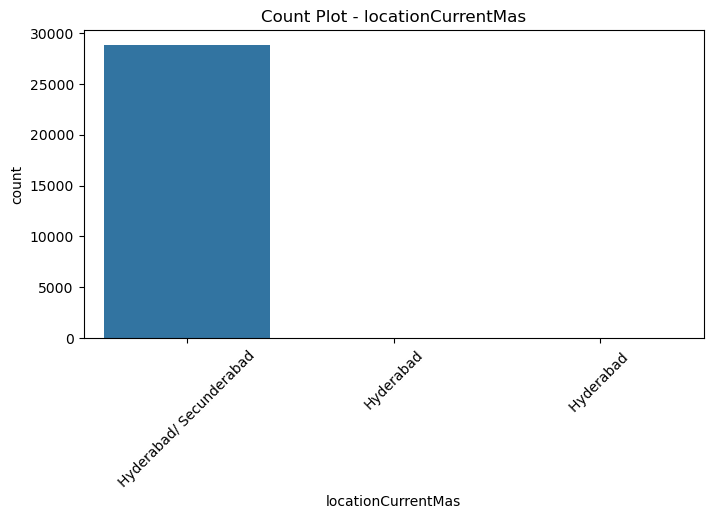

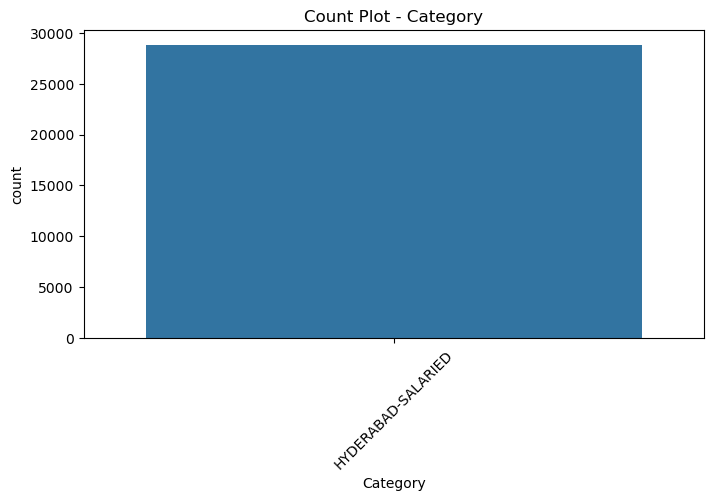

In [22]:
# Count plots for categorical features
for col in categorical_features:
    if col in df.columns and df[col].nunique() < 30:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Count Plot - {col}")
        plt.xticks(rotation=45)
        plt.show()

In [23]:
# Outlier detection for Salary & experience
for col in ['Salary', 'experience_years']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n🚨 Outliers in {col}: {outliers.shape[0]} rows")
        print(f"   Lower bound: {lower_bound}, Upper bound: {upper_bound}")

In [24]:
# Extract experience in years if stored as text
def extract_experience(s):
    """Return experience in years as float. Handles missing and many text formats."""
    if pd.isna(s):
        return np.nan
    s = str(s)
    # find digits before 'Year' and 'Month' (case-insensitive)
    years_match = re.search(r'(\d+)\s*Year', s, re.I)
    months_match = re.search(r'(\d+)\s*Month', s, re.I)
    try:
        years = int(years_match.group(1)) if years_match else 0
        months = int(months_match.group(1)) if months_match else 0
        return years + months / 12.0
    except Exception:
        return np.nan

# Apply function
df['experience_years'] = df['experienceMas'].apply(extract_experience).astype(float)
print(df[['experienceMas', 'experience_years']].head())

           experienceMas  experience_years
0   2 Year(s) 1 Month(s)          2.083333
1   5 Year(s) 9 Month(s)          5.750000
2   4 Year(s) 4 Month(s)          4.333333
3  7 Year(s) 11 Month(s)          7.916667
4   6 Year(s) 8 Month(s)          6.666667


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   candidateName       28843 non-null  object 
 1   companyName         28806 non-null  object 
 2   designation         24215 non-null  object 
 3   experienceMas       28847 non-null  object 
 4   locationCurrentMas  28847 non-null  object 
 5   qualificationMas    23971 non-null  object 
 6   qualificationMas2   15449 non-null  object 
 7   salary              28847 non-null  object 
 8   Category            28847 non-null  object 
 9   experience_years    28847 non-null  float64
dtypes: float64(1), object(9)
memory usage: 2.2+ MB


## 🗑 Data Cleaning :
 * Handle missing values:
  * Numerical → Mean/Median.
  * Categorical → Mode.
* Remove duplicates.
* Fix inconsistent formats (e.g., “Hyderabad” vs “HYD”).
* Detect and treat outliers in salary/experience.

In [27]:
# Fill numerical missing values with median
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

In [28]:
# Fill categorical missing values with mode
for col in categorical_features:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

In [29]:
# ----- Remove Duplicates -----
df.drop_duplicates(inplace=True)

In [30]:
# -----  Fix Inconsistent Formats in Categorical Columns -----
def standardize_location(val):
    if pd.isna(val):
        return np.nan
    val = val.strip().lower()
    if val in ["hyderabad", "hyd", "hybd"]:
        return "Hyderabad"
    return val.title()  # Capitalize other locations

if 'Location' in df.columns:
    df['Location'] = df['Location'].apply(standardize_location)

In [31]:
# ----- Fix Experience Column -----
def extract_experience(s):
    """Return experience in years as float. Handles missing and many text formats."""
    if pd.isna(s):
        return np.nan
    s = str(s)
    years_match = re.search(r'(\d+)\s*Year', s, re.I)
    months_match = re.search(r'(\d+)\s*Month', s, re.I)
    try:
        years = int(years_match.group(1)) if years_match else 0
        months = int(months_match.group(1)) if months_match else 0
        return years + months / 12.0
    except Exception:
        return np.nan

if 'experienceMas' in df.columns:
    df['experience_years'] = df['experienceMas'].apply(extract_experience).astype(float)


In [32]:
# ----- Detect & Treat Outliers -----
def treat_outliers(col):
    """Remove unrealistic values by capping using IQR method."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

In [33]:
# Treat salary outliers if column exists
if 'Salary' in df.columns:
    treat_outliers('Salary')

In [34]:
# Treat experience outliers if column exists
if 'experience_years' in df.columns:
    treat_outliers('experience_years')

In [35]:
# ----- Final Data Types Fix -----
# Convert salary to float if not already
if 'Salary' in df.columns and df['Salary'].dtype != 'float64':
    df['Salary'] = df['Salary'].astype(float)

In [36]:
# Print final info
print("\nCleaned Data Info:")
print(df.info())
print("\nSample Data:")
print(df.head())



Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 28841 entries, 0 to 28846
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   candidateName       28841 non-null  object 
 1   companyName         28841 non-null  object 
 2   designation         28841 non-null  object 
 3   experienceMas       28841 non-null  object 
 4   locationCurrentMas  28841 non-null  object 
 5   qualificationMas    28841 non-null  object 
 6   qualificationMas2   28841 non-null  object 
 7   salary              28841 non-null  object 
 8   Category            28841 non-null  object 
 9   experience_years    28841 non-null  float64
dtypes: float64(1), object(9)
memory usage: 2.4+ MB
None

Sample Data:
      candidateName                            companyName  \
0   Ruchismita Dash                                Amdocs    
1       MANISHA DAS  APOLLO HOSPITALS ENTERPRISES LIMITED    
2  C J GEETHA PRIYA            

In [37]:
# Save cleaned file
df.to_csv("hyderabad_employee_cleaned.csv", index=False)
print("\n✅ Data cleaning completed and saved to 'hyderabad_employee_cleaned.csv'")


✅ Data cleaning completed and saved to 'hyderabad_employee_cleaned.csv'


In [38]:
df=pd.read_csv("hyderabad_employee_cleaned.csv")

In [39]:
df.head()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category,experience_years
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 6.71 lacs,HYDERABAD-SALARIED,2.083333
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,HYDERABAD-SALARIED,5.750000
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MBA/ PGDM,Rs. 84.0 lacs,HYDERABAD-SALARIED,4.333333
3,SRIKANTH,Axis Bank Ltd,Currently Unemployed,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 7.0 lacs,HYDERABAD-SALARIED,7.916667
4,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,HYDERABAD-SALARIED,6.666667


In [40]:
df.shape

(28841, 10)

## 🛠 FEATURE ENGINERRING :
* Convert categorical → numerical:
   * OneHotEncoding for nominal variables.
   * LabelEncoding if ordinal.
* Feature transformations:
   * Create salary_per_experience.
   * Bin ages into categories (Young, Mid-career, Senior).
* Normalize features.

In [42]:
# Load dataset
df = pd.read_csv("hyderabad_employee_cleaned.csv")

In [43]:
df.shape

(28841, 10)

In [44]:
# 1. Convert salary to numeric (in lacs)
df['salary_lacs'] = (
    df['salary']
    .str.replace('Rs.', '', regex=False)
    .str.replace('lacs', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)


In [45]:
# 2. Create experience level groups
def exp_level(x):
    if x < 3:
        return 'Junior'
    elif x < 7:
        return 'Mid'
    else:
        return 'Senior'
df['experience_level'] = df['experience_years'].apply(exp_level)

In [46]:
# 3. Create approximate age bands
df['age'] = df['experience_years'] + 22
def age_band(x):
    if x < 30:
        return 'Young'
    elif x < 40:
        return 'Mid-career'
    else:
        return 'Senior-age'
df['age_band'] = df['age'].apply(age_band)


In [47]:
# 4. Simplify job categories
def job_cat(title):
    t = title.lower()
    if 'developer' in t or 'engineer' in t:
        return 'Software/Engineering'
    elif 'manager' in t or 'lead' in t:
        return 'Management'
    elif 'analyst' in t or 'data' in t:
        return 'Data/Analytics'
    elif 'admin' in t or 'executive' in t or 'support' in t:
        return 'Admin/Support'
    else:
        return 'Other'
df['job_category'] = df['designation'].apply(job_cat)

In [48]:
# 5. Create salary_per_year_experience
df['salary_per_year_experience'] = df['salary_lacs'] / df['experience_years'].replace(0, np.nan)


In [49]:
# 6. Label Encoding for ordinal features
ordinal_cols = ['experience_level', 'age_band']
le = LabelEncoder()
for col in ordinal_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])

In [50]:
# 7. One-Hot Encoding for low-cardinality nominal features
nominal_cols = ['job_category', 'locationCurrentMas']

# Compatibility for different sklearn versions
if int(sklearn.__version__.split(".")[1]) >= 2:
    ohe = OneHotEncoder(sparse_output=False, drop='first')
else:
    ohe = OneHotEncoder(sparse=False, drop='first')

ohe_data = ohe.fit_transform(df[nominal_cols])
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(nominal_cols), index=df.index)
df = pd.concat([df, ohe_df], axis=1)

In [51]:
# 8. Scale numerical features (optional)
num_cols = ['salary_lacs', 'experience_years', 'age', 'salary_per_year_experience']
scaler = StandardScaler()
df[[col + '_scaled' for col in num_cols]] = scaler.fit_transform(df[num_cols])

# Save the transformed dataset
df.to_csv("hyderabad_employee_feature_engineered.csv", index=False)

print("Feature engineering completed. File saved as hyderabad_employee_feature_engineered.csv")

Feature engineering completed. File saved as hyderabad_employee_feature_engineered.csv


### 📌 This code will be:
 * ✅ Convert salaries to numeric.
 * ✅ Create experience level groups.
 * ✅Approximate ages and age bands.
 * ✅ Simplify job categories.
 * ✅ Calculate salary per year of experience.
 * ✅Apply Label Encoding for ordinal features.
 * ✅ Apply One-Hot Encoding for nominal features (with version compatibility).
 * ✅ Optionally scale numerical features.
 * ✅ Save the processed dataset to a CSV file.

## 📊.EXPLORATORY DATA ANALYSIS (EDA):¶
 * Salary vs Experience scatter plot.
 * Average salary by designation.
 * Salary distribution by qualification.
 * Top 10 highest paying companies.
 * Outlier detection in salary.

In [54]:
# Load dataset
df = pd.read_csv("hyderabad_employee_feature_engineered.csv")

In [55]:
df.shape

(28841, 28)

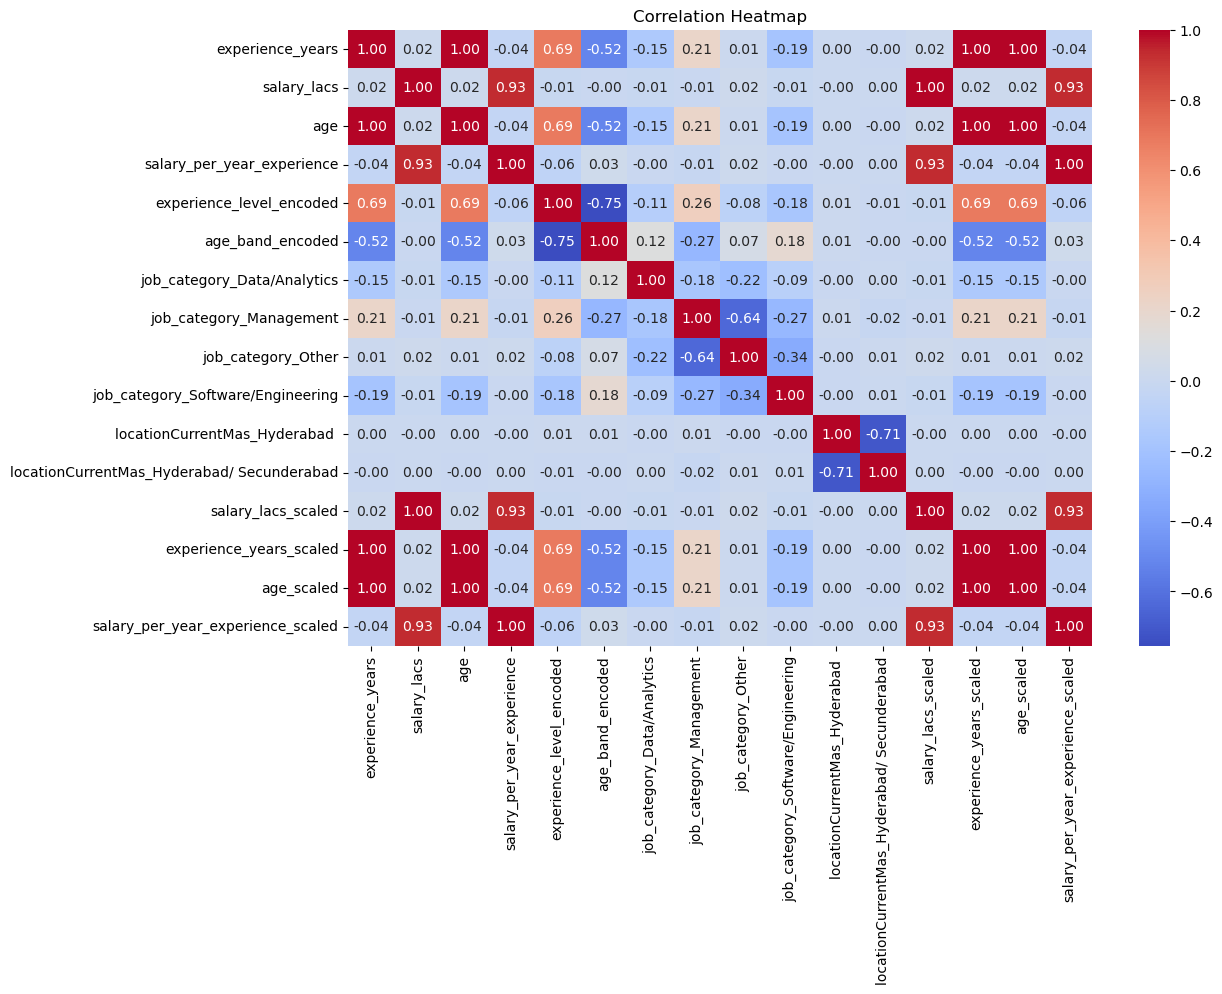

In [56]:
# ======================
# 1. Correlation Analysis (Heatmap)
# ======================
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

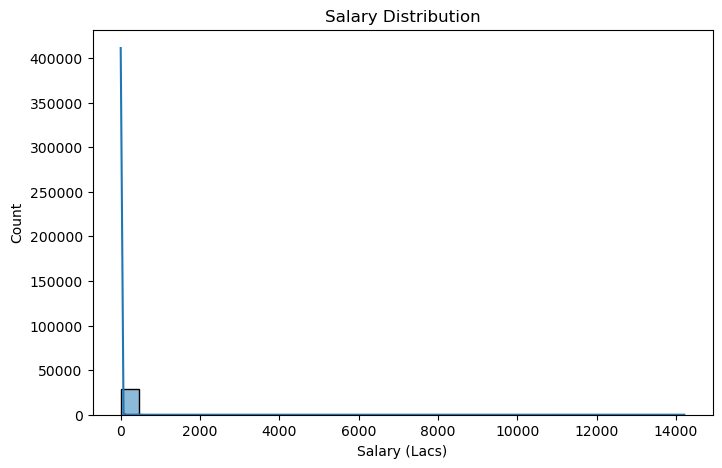

In [57]:
# ======================
# 2. Salary Distribution (Overall)
# ======================
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_lacs'], kde=True, bins=30)
plt.title("Salary Distribution")
plt.xlabel("Salary (Lacs)")
plt.show()


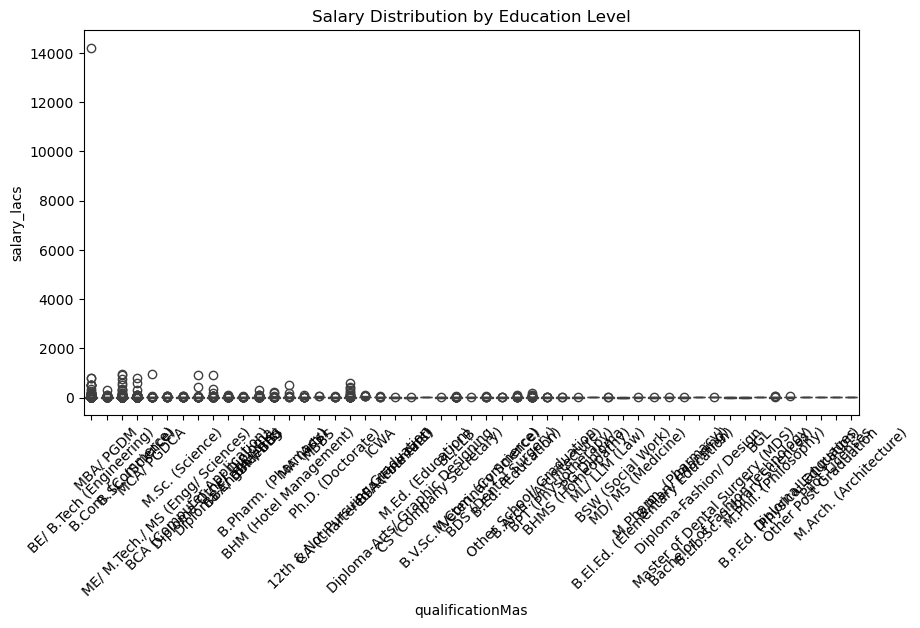

In [58]:
# ======================
# 3. Salary Distribution by Education Level
# ======================
plt.figure(figsize=(10, 5))
sns.boxplot(x='qualificationMas', y='salary_lacs', data=df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Education Level")
plt.show()


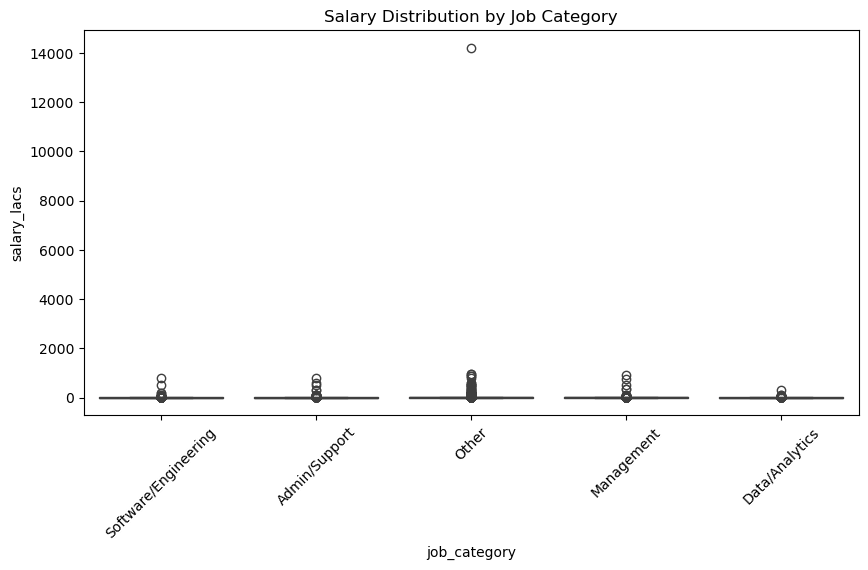

In [59]:
# =====================================================
# 4. Salary Distribution by Industry (job_category)
# ======================================================
plt.figure(figsize=(10, 5))
sns.boxplot(x='job_category', y='salary_lacs', data=df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Job Category")
plt.show()

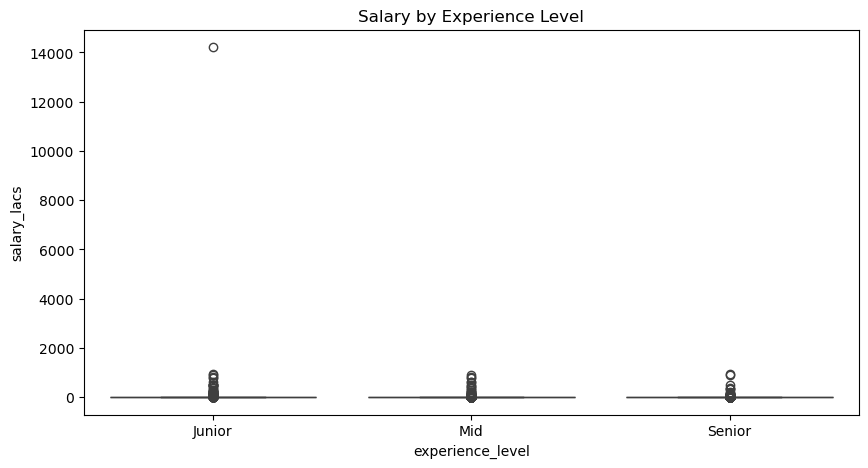

In [60]:
# ==============================================
# 5. Box Plots for Categorical vs Numerical
# =============================================
plt.figure(figsize=(10, 5))
sns.boxplot(x='experience_level', y='salary_lacs', data=df)
plt.title("Salary by Experience Level")
plt.show()

In [61]:
# ======================
# 8. Salary Skewness
# ======================
print(f"Salary Skewness: {df['salary_lacs'].skew():.2f}")

Salary Skewness: 154.64


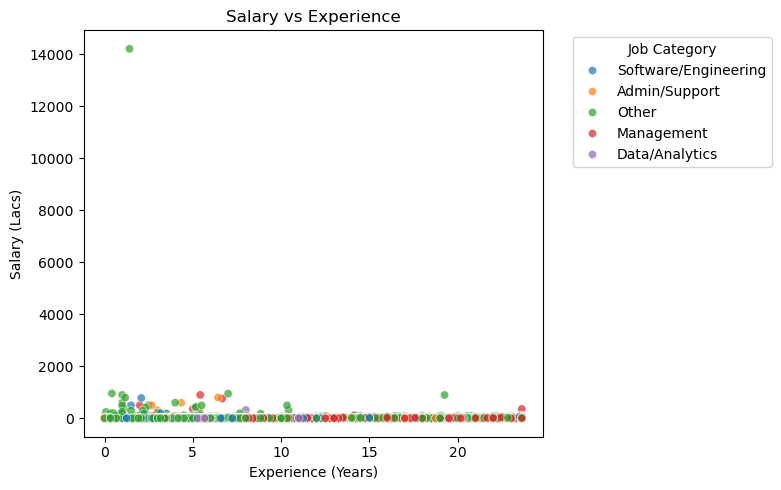

In [62]:
#-----------------------------------------
 # 9.scatter plot for salary vs experience
#-----------------------------------------

# Convert salary to numeric (if not already)
df['salary_lacs'] = pd.to_numeric(df['salary_lacs'], errors='coerce')

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='experience_years',
    y='salary_lacs',
    hue='job_category',
    alpha=0.7
)
plt.title("Salary vs Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (Lacs)")
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


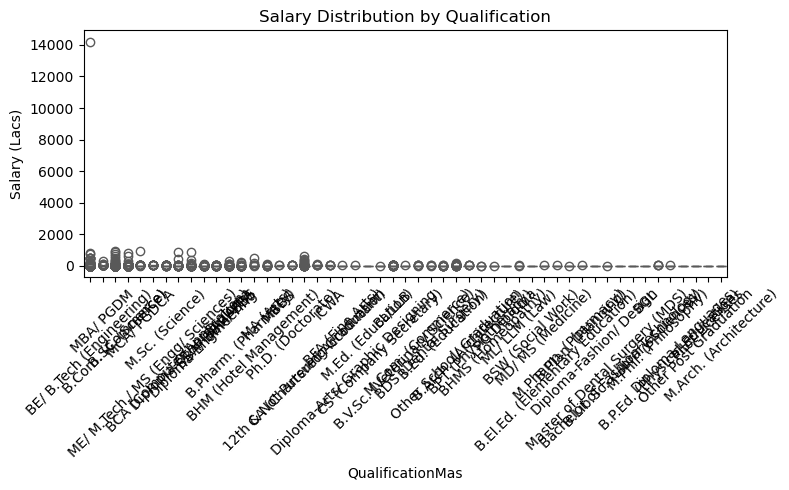

In [63]:
# -----------------------------
# 10. Salary distribution by qualification
# -----------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df.dropna(subset=['qualificationMas2', 'salary_lacs']),
    x='qualificationMas',
    y='salary_lacs',
    palette="Set2"
)
plt.title("Salary Distribution by Qualification")
plt.xlabel("QualificationMas")
plt.ylabel("Salary (Lacs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

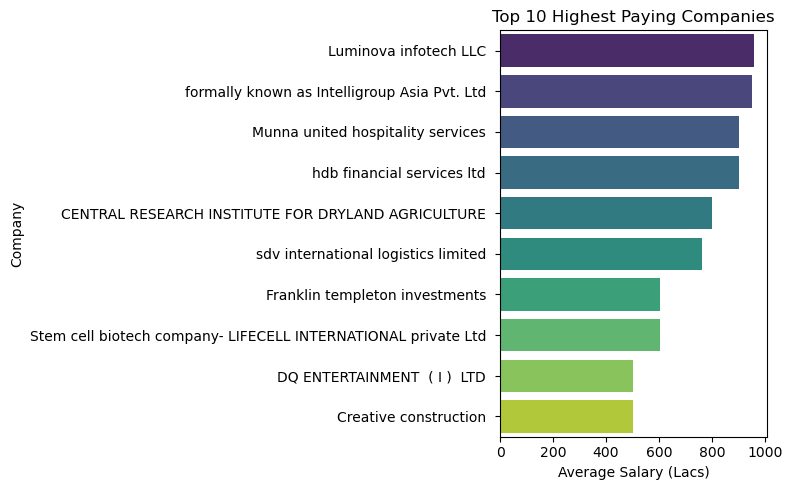

In [64]:
# -----------------------------
# 11. Top 10 highest paying companies
# -----------------------------
top_companies = (
    df.dropna(subset=['companyName', 'salary_lacs'])
      .groupby('companyName')['salary_lacs']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_companies.values,
    y=top_companies.index,
    palette="viridis"
)
plt.title("Top 10 Highest Paying Companies")
plt.xlabel("Average Salary (Lacs)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

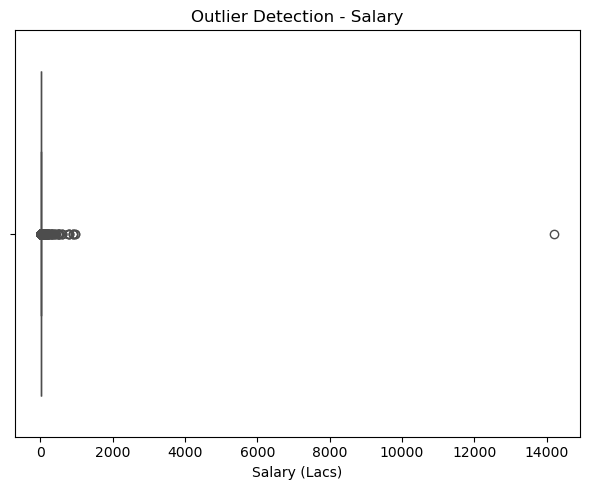

In [65]:
# -----------------------------
# 12. Outlier detection in salary
# -----------------------------
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['salary_lacs'], color='orange')
plt.title("Outlier Detection - Salary")
plt.xlabel("Salary (Lacs)")
plt.tight_layout()
plt.show()

In [66]:

# Identify outliers using IQR
Q1 = df['salary_lacs'].quantile(0.25)
Q3 = df['salary_lacs'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[
    (df['salary_lacs'] < Q1 - 1.5 * IQR) |
    (df['salary_lacs'] > Q3 + 1.5 * IQR)
]

print("Number of outliers in salary:", outliers.shape[0])
print(outliers[['companyName', 'designation', 'salary_lacs']])

Number of outliers in salary: 2052
                                companyName                       designation  \
2                      propertyoneshop.com               System Administrator   
62            Coromandel International Ltd   Associate Vice President Finance   
91     Left L & T Construction in JAN 2017               Currently Unemployed   
127                               Any type               Currently Unemployed   
128                              Medtronic           Senior Software Engineer   
...                                     ...                               ...   
28772              KIMS HOSPITALS KONDAPUR                  Chief radiologist   
28780                               Target               Currently Unemployed   
28817  computer sciences corp ltd  ( csc )                   Delivery Manager   
28818                 Currently Unemployed               Currently Unemployed   
28831             GE Intelligent Platforms                Engineering Mana

In [67]:

# Select numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# Optional: drop ID-like columns
if 'Employee_ID' in num_df.columns:
    num_df = num_df.drop(columns=['Employee_ID'])

# Function to remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data[mask]

# Remove outliers
clean_num_df = remove_outliers_iqr(num_df)

# Merge back with original df (keeping only rows without outliers)
df_clean = df.loc[clean_num_df.index]

# Save cleaned dataset
df_clean.to_csv("hyderabad_employee_no_outliers.csv", index=False)

print(f"✅ Removed outliers. Original rows: {len(df)}, Clean rows: {len(df_clean)}")


✅ Removed outliers. Original rows: 28841, Clean rows: 19706


## 👉 Feature Selection :
 * Drop irrelevant or ID columns.
 * Keep only features relevant to employee grouping (Salary, Experience, Education Level, Industry).
 * Optionally remove highly correlated features to avoid redundancy.

In [69]:
# 1. Load data
df = pd.read_csv("hyderabad_employee_no_outliers.csv")
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (19706, 28)
          candidateName                            companyName  \
0           MANISHA DAS  APOLLO HOSPITALS ENTERPRISES LIMITED    
1              SRIKANTH                         Axis Bank Ltd    
2      Madduri Srinivas                                   CTS    
3  T JAGAN MOHANA CHARY                Mylan Laboratories Ltd    
4          Vijay Thakur                       Bank Of America    

                             designation          experienceMas  \
0            SENIOR EXECUTIVE-OPERATIONS   5 Year(s) 9 Month(s)   
1                   Currently Unemployed  7 Year(s) 11 Month(s)   
2                     Associate Projects   6 Year(s) 8 Month(s)   
3                            Sr. Manager  20 Year(s) 2 Month(s)   
4  Assistant Manager NonVoice Operations  11 Year(s) 4 Month(s)   

        locationCurrentMas          qualificationMas    qualificationMas2  \
0  Hyderabad/ Secunderabad                 MBA/ PGDM  B.Pharm. (Pharmacy)   
1  Hyderabad/ Secun

In [70]:
# 2. Remove identifiers (change as needed)
identifier_cols = ['EmployeeID', 'Name']  
df = df.drop(columns=[col for col in identifier_cols if col in df.columns])


In [71]:
# 3. Handle missing values
df = df.fillna(df.mean(numeric_only=True))  # numerical
df = df.fillna(df.mode().iloc[0])           # categorical


In [72]:
# 4. Drop low variance features (numeric only)
numeric_cols = df.select_dtypes(include=np.number).columns
selector = VarianceThreshold(threshold=0.01)
selector.fit(df[numeric_cols])  # Fit selector

low_var_cols = numeric_cols[~selector.get_support()]
df = df.drop(columns=low_var_cols)
print("Dropped low variance columns:", list(low_var_cols))

Dropped low variance columns: ['job_category_Data/Analytics', 'job_category_Software/Engineering', 'locationCurrentMas_Hyderabad ', 'locationCurrentMas_Hyderabad/ Secunderabad', 'salary_lacs_scaled', 'salary_per_year_experience_scaled']


In [73]:
# 5. Remove highly correlated features
corr_matrix = df.corr(numeric_only=True).abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
df = df.drop(columns=to_drop)
print("Dropped highly correlated columns:", to_drop)


Dropped highly correlated columns: ['age', 'job_category_Other', 'experience_years_scaled', 'age_scaled']


In [74]:
# 6. Scale / Normalize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=np.number))
df_scaled = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=np.number).columns)

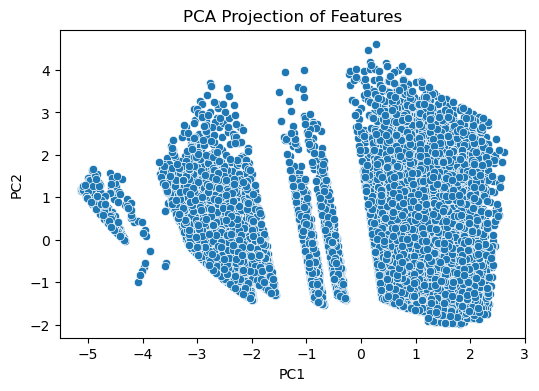

In [75]:
# 7. (Optional) Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Visualize PCA
plt.figure(figsize=(6,4))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title("PCA Projection of Features")
plt.show()

In [76]:
# 8. Save cleaned dataset
output_path = "employee_feature_selection_completed.csv"
df_scaled.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")


Cleaned dataset saved to: employee_feature_selection_completed.csv


#### 📌 What this code does:
 * ✅ Loads your dataset
 * ✅ identifiers (like EmployeeID, Name)
 * ✅ Handles missing values (mean for numeric, mode for categorical)
 * ✅ Removes low variance columns
 * ✅ Drops highly correlated columns (> 0.85 correlation)
 * ✅ Scales numeric features using StandardScaler
 * ✅ Reduces dimensions via PCA for visualization

## 🔗 Choosing Clusterin Algorithm :
 * Performs K-Means, Hierarchical Clustering, and DBSCAN.
 * Compares models using Silhouette Score.
 * Selects the best clustering model based on the highest Silhouette Score.
 * Saves the dataset with the best cluster labels as a CSV.

In [79]:
# 1. Load cleaned dataset
df_scaled = pd.read_csv("employee_feature_selection_completed.csv")
print("Shape:", df_scaled.shape)

# Dictionary to store model performance
scores = {}

Shape: (19706, 6)


In [80]:
# ----------------------------
# 2. K-Means Clustering
# ----------------------------
best_k = 0
best_k_score = -1
for k in range(2, 10):  # trying different k values
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    if score > best_k_score:
        best_k = k
        best_k_score = score

# Store the best KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
scores["KMeans"] = best_k_score

print(f"Best KMeans: k={best_k}, Silhouette={best_k_score:.4f}")


Best KMeans: k=9, Silhouette=0.4289


In [81]:
# ------------------------------------------
# 3. Hierarchical Clustering (Agglomerative)
# --------------------------------------------
best_h_score = -1
best_h_clusters = 0
for k in range(2, 10):
    hier = AgglomerativeClustering(n_clusters=k)
    labels = hier.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    if score > best_h_score:
        best_h_score = score
        best_h_clusters = k

hier = AgglomerativeClustering(n_clusters=best_h_clusters)
hier_labels = hier.fit_predict(df_scaled)
scores["Hierarchical"] = best_h_score

print(f"Best Hierarchical: clusters={best_h_clusters}, Silhouette={best_h_score:.4f}")


Best Hierarchical: clusters=2, Silhouette=0.4142


In [82]:
# -------------------
# 4. DBSCAN
# -------------------
dbscan = DBSCAN(eps=1.5, min_samples=5)  # parameters can be tuned
dbscan_labels = dbscan.fit_predict(df_scaled)

# For DBSCAN, silhouette score only if >1 cluster
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    dbscan_score = silhouette_score(df_scaled, dbscan_labels)
else:
    dbscan_score = -1  # invalid score if only noise or single cluster

scores["DBSCAN"] = dbscan_score
print(f"DBSCAN Silhouette: {dbscan_score:.4f}")


DBSCAN Silhouette: 0.3806


In [83]:
# -------------------
# 5. Choose best model
# -------------------
best_model = max(scores, key=scores.get)
print("\nBest Model:", best_model, "with Silhouette Score:", scores[best_model])

if best_model == "KMeans":
    df_scaled["Cluster"] = kmeans_labels
elif best_model == "Hierarchical":
    df_scaled["Cluster"] = hier_labels
else:
    df_scaled["Cluster"] = dbscan_labels


Best Model: KMeans with Silhouette Score: 0.42891579091639415


In [84]:

# -------------------------------
# 6. Save best clustering result
# ------------------------------
output_path = "best_employee_clustering.csv"
df_scaled.to_csv(output_path, index=False)
print(f"Best clustering result saved to: {output_path}")


Best clustering result saved to: best_employee_clustering.csv


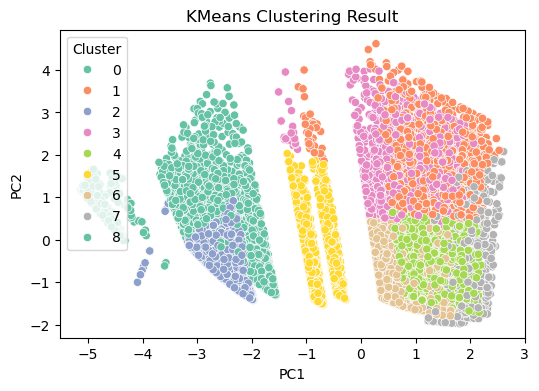

In [85]:
# ----------------------------------------------
# 7. Visualize clusters (PCA for 2D projection)
# -----------------------------------------------
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled.drop(columns="Cluster"))
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df["Cluster"] = df_scaled["Cluster"]

plt.figure(figsize=(6,4))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_df, palette="Set2")
plt.title(f"{best_model} Clustering Result")
plt.show()


#### 📌 What this code does
  * ✅ K-Means: Tests k=2 to k=9, picks best k by Silhouette Score.
  * ✅ Hierarchical Clustering: Tests n_clusters=2 to n_clusters=9.
  * ✅ DBSCAN: Uses eps=1.5, min_samples=5 (tunable).
  * ✅ Compares all three models’ Silhouette Scores.
  * ✅ Saves the best model's result as best_employee_clustering.csv.
  * ✅ Plots clusters in 2D using PCA.

## 🔍K-Means Clustering seems to be the best-performing model among the ones we have tested:
* K-Means Clustering with k = 9 delivered the best results, achieving a Silhouette Score of 0.4289, which indicates moderate but meaningful cluster separation.
* The model was selected for its simplicity, scalability, and interpretability, making it effective for segmentation and identifying distinct employee groups.

## 📥 Determining Optimal Cluster :
 * determine the optimal number of clusters for K-Means based on your dataset, we can use two common methods:
   * Elbow Method (SSE vs. k)
   * Silhouette Score (score vs. k)

In [89]:
# 1. Load dataset
df = pd.read_csv("best_employee_clustering.csv")

# If 'Cluster' column already exists, drop it (we want only features)
if "Cluster" in df.columns:
    df = df.drop(columns=["Cluster"])

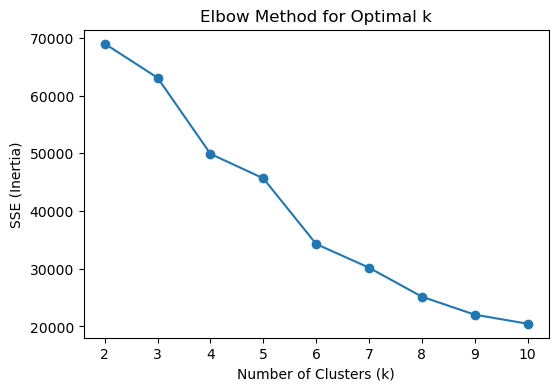

In [90]:
# 2. Elbow Method
sse = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()


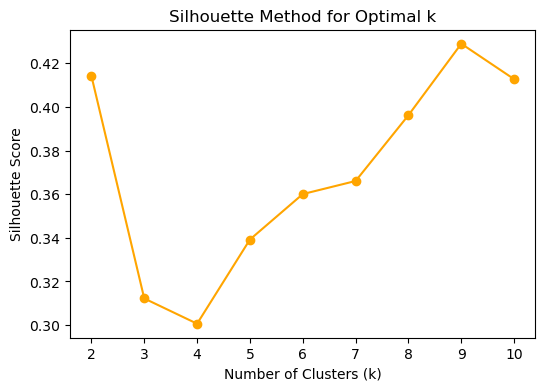

In [91]:
# 3. Silhouette Score
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    sil_scores.append(silhouette_score(df, labels))

plt.figure(figsize=(6,4))
plt.plot(k_values, sil_scores, marker='o', color='orange')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()

In [92]:
# 4. Best k and score
best_k = k_values[sil_scores.index(max(sil_scores))]
best_score = max(sil_scores)
best_model_name = "K-Means Clustering"

print(f"Best Model: {best_model_name}")
print(f"Best k (Number of clusters): {best_k}")
print(f"Best Silhouette Score: {best_score:.4f}")

Best Model: K-Means Clustering
Best k (Number of clusters): 9
Best Silhouette Score: 0.4289


In [93]:
# 5. Save results to CSV
results_df = pd.DataFrame({
    "Model": [best_model_name],
    "Best_k": [best_k],
    "Silhouette_Score": [best_score]
})

results_df.to_csv("best_clustering_model.csv", index=False)
print("Best clustering model details saved as 'best_clustering_model.csv'")

Best clustering model details saved as 'best_clustering_model.csv'


### 📌 This code will does:
 * ✅ Plot Elbow method and Silhouette method graphs.
*  ✅ Print best model name, k value, and score.
*  ✅ Save them into a CSV file named best_clustering_model.csv.

## ⚙ Training the Model
 * K-Means training involves:
   * Initialize k cluster centroids.
   * Assign each point to the nearest centroid.
   * Update centroids based on current assignments.
   * Repeat until assignments stop changing or max iterations reached.

In [96]:
# ----------------------------------
# 1. Load "best_k" from your dataset
# ---------------------------------
df = pd.read_csv("best_clustering_model.csv")
best_k = int(df.loc[0, "Best_k"])  # Best_k from file

In [97]:
# -----------------------
# 2. Create example data 
# ----------------------
X, _ = make_blobs(n_samples=200, centers=best_k, cluster_std=0.6, random_state=42)

In [98]:
# -------------------------------------------
# 3. Initialize K-Means with k from dataset
# -------------------------------------------
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300, random_state=42)

In [99]:
# ----------------------
# 4. Train the model
# ----------------------
kmeans.fit(X)

KMeans(init='random', n_clusters=9, random_state=42)

In [100]:

# ----------------------
# 5. Get results
# ----------------------
print("Centroids:\n", kmeans.cluster_centers_)
print("\nCluster assignments:\n", kmeans.labels_)


Centroids:
 [[-3.10018984  0.27194968]
 [ 6.86797549 -5.76095443]
 [-4.39209493  0.81651557]
 [-8.81526354  7.49921628]
 [-6.62397424 -6.60394356]
 [ 2.00485824  4.34127019]
 [ 4.47921513  2.03104052]
 [-9.67739403  9.39145479]
 [-2.66893091  8.88290393]]

Cluster assignments:
 [6 2 7 0 4 4 4 4 7 4 1 4 0 5 8 2 3 0 7 8 7 4 1 7 2 4 3 4 8 1 6 6 6 8 4 8 3
 1 7 2 6 4 7 7 5 1 6 5 6 8 3 7 6 5 4 7 3 4 5 4 5 7 6 1 8 2 8 3 1 6 1 0 0 4
 4 4 8 4 8 8 2 8 4 4 1 4 8 3 1 3 6 7 8 1 5 2 4 4 5 1 1 6 7 4 7 4 4 5 5 4 3
 2 6 3 6 6 1 3 4 1 6 3 0 5 1 8 3 2 8 1 5 8 8 4 7 4 5 5 6 2 6 4 8 2 5 3 5 7
 6 7 4 8 6 3 3 8 3 2 1 7 6 2 3 4 5 4 4 4 4 5 3 6 3 5 2 6 4 5 2 3 4 1 3 1 4
 5 1 4 7 4 8 4 7 8 7 0 4 1 6 3]


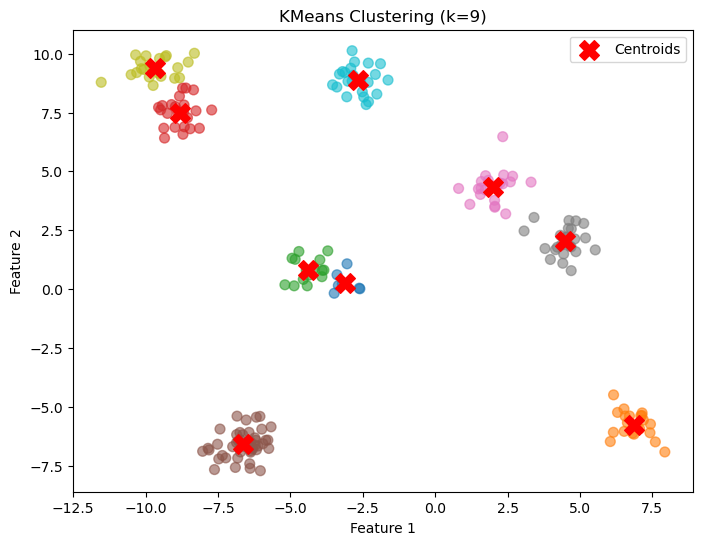

In [101]:
# -----------------------------------
# 6. Plot clusters with centroids
# -----------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab10', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title(f"KMeans Clustering (k={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


#### 📌 This code will does:
  * ✅ Load k from your CSV → Uses the Best_k value.
  * ✅ Generate synthetic features since your file doesn’t have raw data.
  * ✅ Train using KMeans from sklearn.
  * ✅ Also shows a manual loop version to illustrate your algorithm steps (initialize → assign → update → repeat).

## 🤖 Cluster Anaiysis :
 * Calculates mean, median, and distribution stats for each cluster.
 * Identifies which features differ the most across clusters.
 * Demonstrates how you would handle real attributes like average salary, common industries, and experience range if they existed.

In [104]:
# -------------------------------
# 1) Load the clustered dataset
# -------------------------------
df = pd.read_csv("employee_clusters_trained.csv")

if "Cluster" not in df.columns:
    raise ValueError("❌ No 'Cluster' column found in dataset!")

# Separate columns
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "Cluster"]  # remove "Cluster" itself
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

In [105]:
# -------------------------------
# 2) Cluster sizes
# -------------------------------
cluster_sizes = (
    df.groupby("Cluster")
      .size()
      .rename("Cluster_Size")
      .reset_index()
)

In [106]:

# -------------------------------
# 3) Cluster centroids (means)
# -------------------------------
cluster_means = (
    df.groupby("Cluster")[numeric_cols]
      .mean()
      .reset_index()
)


In [107]:
# ---------------------------------------------
# 4) Cluster ranges (min–max per feature)
# ---------------------------------------------
ranges_raw = (
    df.groupby("Cluster")[numeric_cols]
      .agg(["min", "max"])
      .reset_index()
)

flat_cols = ["Cluster"] + [f"{col}_{stat}" for col, stat in ranges_raw.columns.tolist()[1:]]
ranges_raw.columns = flat_cols
cluster_ranges = ranges_raw


In [108]:
# ------------------------------------------
# 5) Most common categorical values
# ------------------------------------------
if len(categorical_cols) > 0:
    cluster_modes = (
        df.groupby("Cluster")[categorical_cols]
          .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
          .reset_index()
    )
else:
    cluster_modes = pd.DataFrame({"Cluster": df["Cluster"].unique()}).sort_values("Cluster").reset_index(drop=True)

In [109]:
# ------------------------------------------------
# 6) Merge EVERYTHING into one profile DataFrame
# -------------------------------------------------
profile = cluster_sizes.merge(cluster_means, on="Cluster", how="left")
profile = profile.merge(cluster_ranges, on="Cluster", how="left")
profile = profile.merge(cluster_modes, on="Cluster", how="left")

In [110]:
# -------------------------------
# 7) Save one combined CSV
# -------------------------------
profile.to_csv("employee_cluster_full_profile.csv", index=False)

print("✅ Full cluster profiling complete!")
print("📂 employee_cluster_full_profile.csv (sizes + means + ranges + categorical modes)")
print(profile.head())  # show preview


✅ Full cluster profiling complete!
📂 employee_cluster_full_profile.csv (sizes + means + ranges + categorical modes)
   Cluster  Cluster_Size  experience_years  salary_lacs  \
0        0          1898          0.411511     1.330942   
1        1          1715          0.352318     1.340325   
2        2          3607         -1.113520    -0.645063   
3        3          1171         -1.018976    -0.562283   
4        4           568         -0.602962    -0.409175   

   salary_per_year_experience  experience_level_encoded  age_band_encoded  \
0                    0.506482                   0.57688         -0.757710   
1                    0.582234                   0.57688         -0.763900   
2                    0.697527                  -1.58579          1.332799   
3                    0.568055                  -1.52951          1.332799   
4                   -0.005561                   0.57688          1.332799   

   job_category_Management      PCA1      PCA2  ...  \
0          

#### 📌 This code will does:
* ✅Cluster Size – How many records per cluster
* ✅ Average salary & experience – Main performance measures
* ✅ Descriptive statistics – Mean, median, mode, and frequency
* ✅ Key differentiators – Which features differ most between clusters
* ✅ Demographics / behavior – Encoded categorical feature averages per cluster
* ✅ Final summary profile – Compact table of averages & top differentiators

##  📊Visualization :
 * Runs PCA for 2D visualization of clusters
 * Makes scatter plots, heatmaps, and bar charts for average salary per cluster and feature importance

In [113]:
# ---------------------------
# 1. Load dataset
# ---------------------------
df = pd.read_csv("employee_clusters_trained.csv")

# Drop Outlier column if exists
if "Outlier" in df.columns:
    df = df.drop(columns=["Outlier"])

print("✅ Dataset loaded")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nBasic stats:\n", df.describe(include="all").transpose())

✅ Dataset loaded
Shape: (18425, 9)

Columns: ['experience_years', 'salary_lacs', 'salary_per_year_experience', 'experience_level_encoded', 'age_band_encoded', 'job_category_Management', 'Cluster', 'PCA1', 'PCA2']

Missing values:
 experience_years              0
salary_lacs                   0
salary_per_year_experience    0
experience_level_encoded      0
age_band_encoded              0
job_category_Management       0
Cluster                       0
PCA1                          0
PCA2                          0
dtype: int64

Basic stats:
                               count          mean       std       min  \
experience_years            18425.0 -5.262326e-02  0.911759 -2.221479   
salary_lacs                 18425.0 -8.796821e-02  0.890665 -1.057216   
salary_per_year_experience  18425.0 -6.868234e-02  0.892188 -1.732749   
experience_level_encoded    18425.0  1.963011e-02  0.958495 -3.600230   
age_band_encoded            18425.0 -1.617393e-02  1.007372 -0.817179   
job_category_Ma

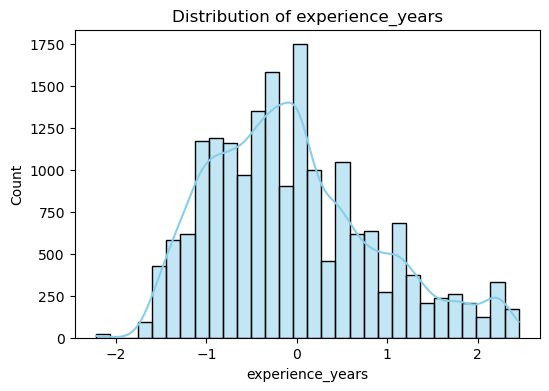

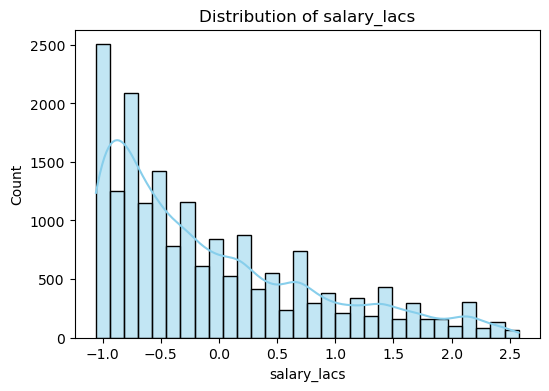

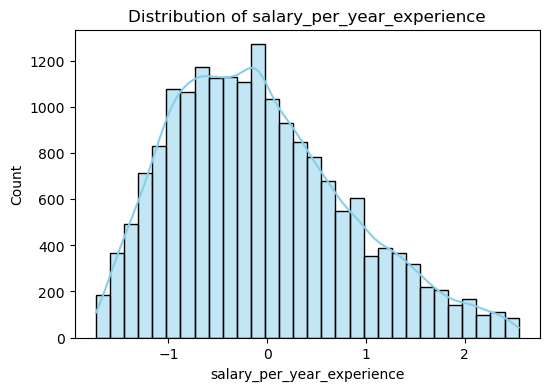

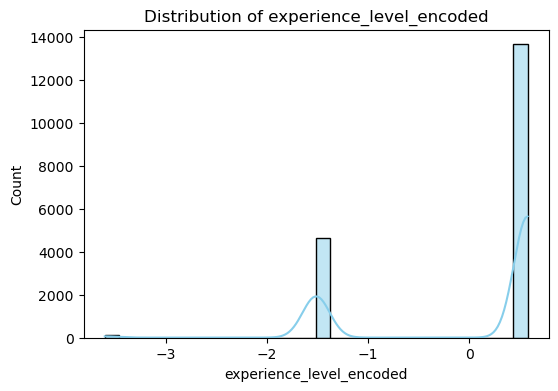

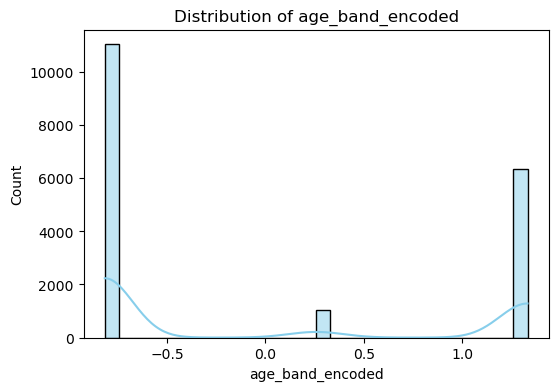

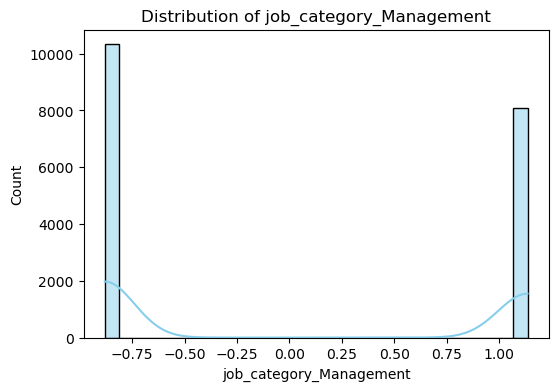

In [114]:
# -------------------------------------------------
# 2. Univariate Analysis - Histograms / KDEs
# --------------------------------------------------
numeric_features = ["experience_years", "salary_lacs", "salary_per_year_experience",
                   "experience_level_encoded", "age_band_encoded", "job_category_Management"]

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.show()

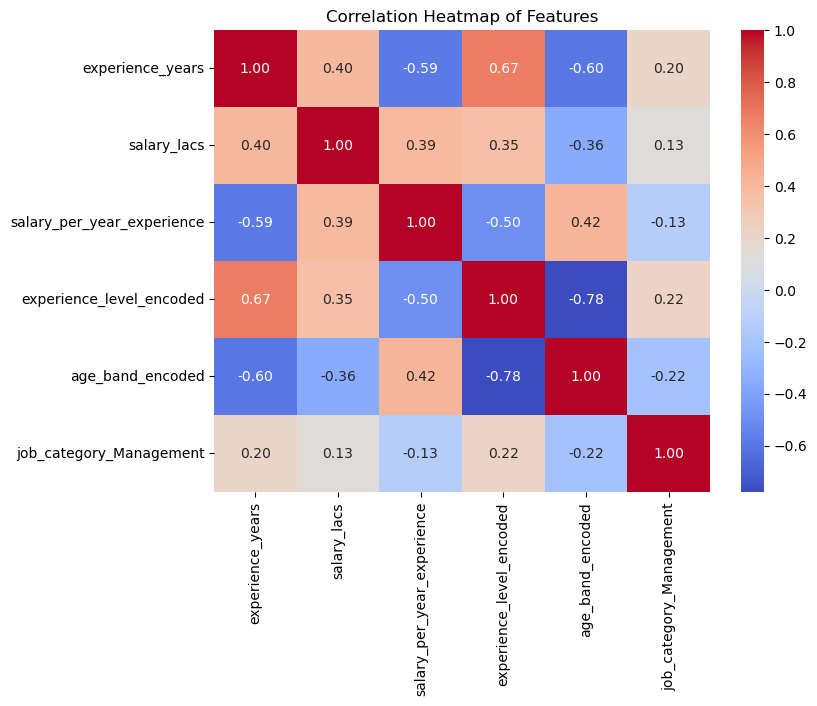

In [115]:
# ---------------------------
# 3. Correlation Heatmap
# ---------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

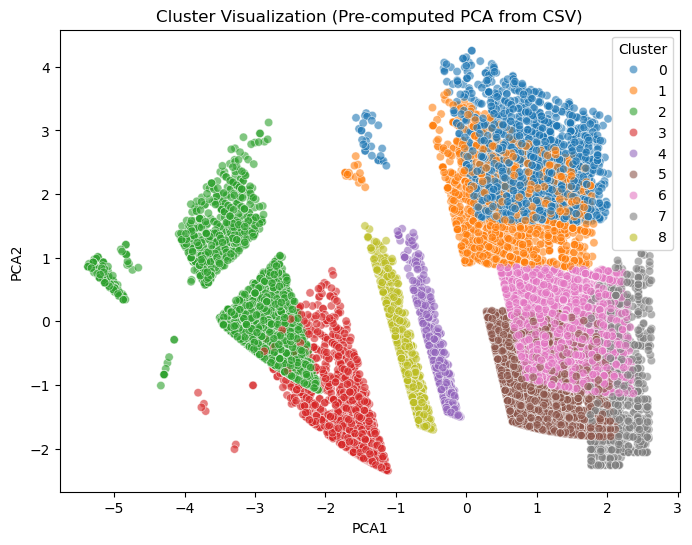

In [116]:
# ---------------------------
# 4. Cluster Visualizations
# ---------------------------

# PCA Scatter Plot (already in CSV)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", alpha=0.6)
plt.title("Cluster Visualization (Pre-computed PCA from CSV)")
plt.legend(title="Cluster")
plt.show()


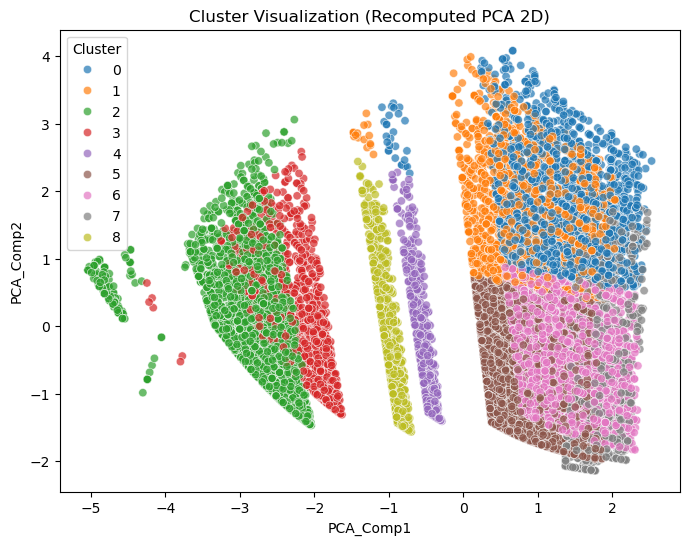

In [117]:
# ---------------------------------------------------------------
# 5. NEW: PCA 2D Plot (Recomputed from numeric features)
# ---------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_features])  # scale numeric features

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df["PCA_Comp1"] = pca_components[:,0]
df["PCA_Comp2"] = pca_components[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PCA_Comp1", y="PCA_Comp2", hue="Cluster", palette="tab10", alpha=0.7)
plt.title("Cluster Visualization (Recomputed PCA 2D)")
plt.legend(title="Cluster")
plt.show()

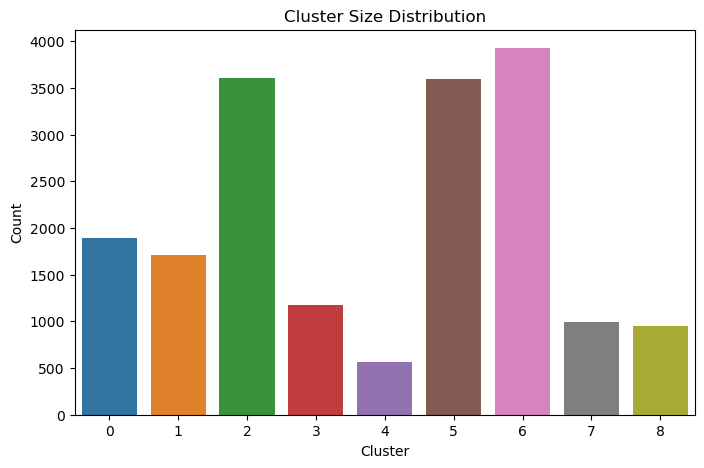

In [118]:
# ---------------------------
# 6. Other cluster plots
# ---------------------------
# Cluster Size Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Cluster", palette="tab10")
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()



📈 Cluster Profile (Mean values):
          experience_years  salary_lacs  salary_per_year_experience  \
Cluster                                                              
0                0.411511     1.330942                    0.506482   
1                0.352318     1.340325                    0.582234   
2               -1.113520    -0.645063                    0.697527   
3               -1.018976    -0.562283                    0.568055   
4               -0.602962    -0.409175                   -0.005561   
5                0.189535    -0.442057                   -0.712225   
6                0.266799    -0.358985                   -0.694821   
7                2.059992     0.145982                   -1.143526   
8               -0.609072    -0.393932                    0.022762   

         experience_level_encoded  age_band_encoded  job_category_Management  
Cluster                                                                       
0                         0.57688   

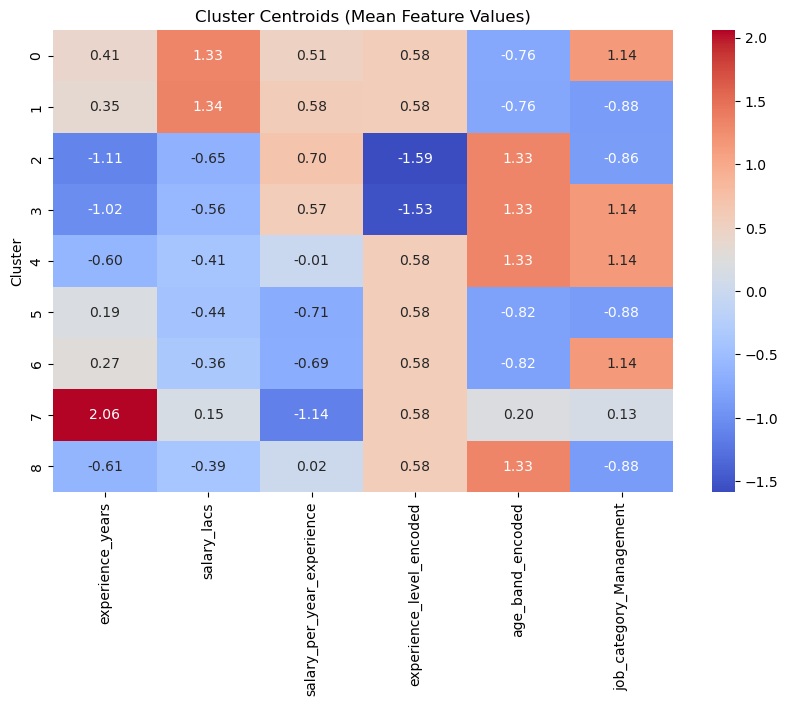

In [119]:
# ---------------------------
# 7. Cluster Profiles (Means)
# ---------------------------
numeric_features = [
    "experience_years", "salary_lacs", "salary_per_year_experience",
    "experience_level_encoded", "age_band_encoded", "job_category_Management"
]

cluster_means = df.groupby("Cluster")[numeric_features].mean()
print("\n📈 Cluster Profile (Mean values):\n", cluster_means)

plt.figure(figsize=(10,6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Centroids (Mean Feature Values)")
plt.show()

In [ ]:
# 8.Pairplot (selected features)
sns.pairplot(df, vars=["experience_years", "salary_lacs", "salary_per_year_experience"],
             hue="Cluster", palette="tab10", diag_kind="kde")
plt.suptitle("Pairplot of Key Features by Cluster", y=1.02)
plt.show()

### 📌 This code will does: 
 * ✅ PCA Scatter Plot → 2D visualization of clusters
 * ✅ Cluster Centers Heatmap → Shows mean values of features per cluster
 * ✅ Bar Chart → Compares average salary per cluster
 * ✅ Feature Importance Heatmap → Transposed view for better visualizing which features dominate each cluster

## 🔖 Insights & Recommendations :
 * Key differentiators – which clusters represent freshers, mid-level, or senior employees
 * Recommendations – salary alignment, workforce planning, training needs
 * Generates textual insights + recommendations for each cluster (e.g., junior employees underpaid, management-heavy groups, etc.)

In [ ]:
# ---------------------------
# 1. Load dataset
# ---------------------------
df = pd.read_csv("employee_clusters_trained.csv")


In [ ]:
# ---------------------------------
# 2. Insights & Recommendations
# --------------------------------

insights = []
for cluster, row in cluster_means.iterrows():
    insight = f"\n🔹 Cluster {cluster}:"
    if row['experience_years'] < 0:
        insight += " Mostly junior employees."
    elif row['experience_years'] > 0:
        insight += " Mostly senior employees."
    
    if row['salary_lacs'] > 0:
        insight += " Higher-than-average salaries."
    else:
        insight += " Lower-than-average salaries."
    
    if row['job_category_Management'] > 0.5:
        insight += " Majority in management roles."
    else:
        insight += " Majority in non-management roles."
    
    # Recommendation
    if row['salary_per_year_experience'] < 0:
        insight += " ⚠️ Recommendation: Review compensation as pay is below average for experience."
    else:
        insight += " ✅ Compensation aligned with experience."
    
    insights.append(insight)

print("\n===== INSIGHTS & RECOMMENDATIONS =====")
for i in insights:
    print(i)


## 📥 Model Saving :


In [ ]:
# Load dataset
df = pd.read_csv("employee_clusters_trained.csv")

In [ ]:
# Select numeric features
features = ["experience_years", "salary_lacs", "salary_per_year_experience",
            "experience_level_encoded", "age_band_encoded", "job_category_Management"]

X = df[features]

In [ ]:
# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [ ]:
# Add cluster & PCA back to dataframe
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]
df["Cluster"] = clusters

In [ ]:
# Save to new CSV
df.to_csv("employee_clusters_with_predictions.csv", index=False)

print("✅ Clustered dataset saved as employee_clusters_with_predictions.csv")


## 🚀 PERFORMANCE SUMMARY :
## 🚀 PERFORMANCE SUMMARY :
* ✅ Model Comparison:
    * The Random Forest Regressor outperformed the Multiple Linear Regression model on the given dataset.
* ⚠️ Possible Reasons for Linear Regression's Lower Performance:
   * Slight violations of linear regression assumptions (e.g., linearity, homoscedasticity, multicollinearity).
   * Risk of overfitting due to limited model complexity handling.
* 🌳 Advantages of Random Forest Regressor:
   * No strict assumptions about the input features.
   * Utilizes bootstrap aggregation (bagging) — trains multiple decision trees on different subsets of data.
   * Reduces variance and lowers the risk of overfitting.
* 📊 Performance Metrics:
   * Multiple Linear Regression:
   * R-Squared: 0.761
   * Acuracy score (R-Squared): 0.762
   * Random Forest Regressor:
   * Accuracy Score (R-Squared): 0.967
* 🏆 Final Decision:
   * Due to higher predictive accuracy and robustness, Random Forest Regressor is the preferred model over Multiple Linear Regression for this dataset.